In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("airlines_flights_data.csv")

In [3]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [4]:
df.shape

(300153, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [6]:
#Check the data types and list which fields need type correction.
df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [7]:
#Identify duplicate rows.
df.drop_duplicates(inplace=True)

In [8]:
#Detect outliers in numeric columns using IQR.

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [9]:
numeric_cols

Index(['index', 'duration', 'days_left', 'price'], dtype='object')

In [10]:

outliers={}

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    outlier_rows = df[(df[col] < lower) | (df[col] > upper)]
    outliers[col] = outlier_rows

    print(f"\nColumn: {col}")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    print(f"Outliers:\n{outlier_rows}")


Column: index
Lower bound: -150076.0
Upper bound: 450228.0
Outliers:
Empty DataFrame
Columns: [index, airline, flight, source_city, departure_time, stops, arrival_time, destination_city, class, duration, days_left, price]
Index: []

Column: duration
Lower bound: -7.1800000000000015
Upper bound: 30.180000000000003
Outliers:
         index    airline   flight source_city departure_time        stops  \
10534    10534    Vistara   UK-706       Delhi      Afternoon  two_or_more   
10535    10535    Vistara   UK-706       Delhi      Afternoon  two_or_more   
10540    10540  Air_India  AI-9887       Delhi  Early_Morning  two_or_more   
10891    10891    Vistara   UK-706       Delhi      Afternoon  two_or_more   
10892    10892    Vistara   UK-706       Delhi      Afternoon  two_or_more   
...        ...        ...      ...         ...            ...          ...   
296064  296064  Air_India   AI-440     Chennai  Early_Morning          one   
296297  296297  Air_India   AI-440     Chennai  Ea

In [11]:
#Her we removed the outliers from the datta set
df_clean=df.copy()

for i in numeric_cols:
    q1=df_clean[i].quantile(0.25)
    q3=df_clean[i].quantile(0.75)

    IQR=q3-q1
    lower=q1-1.5*IQR
    upper=q3+1.5*IQR

    df_clean=df_clean[(df_clean[i]>=lower)&(df_clean[i]<=upper)]

In [12]:
df_clean.shape

(297921, 12)

In [ ]:
#Remove all outlier rows at once
import numpy as np

df_clean = df.copy()
mask = np.ones(len(df_clean), dtype=bool)

for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower = q1 - 1.5 * IQR
    upper = q3 + 1.5 * IQR

    mask = (df[col] >= lower) & (df[col] <= upper)

df_clean = df[mask]


In [14]:
df_clean.shape

(297920, 12)

In [15]:
#Compute mean, median, min, max and standard deviation for all numeric columns.
average=df[numeric_cols].mean()
median=df[numeric_cols].median()
min=df[numeric_cols].min()
max=df[numeric_cols].max()
std=df[numeric_cols].std()

print(f"mean is :{average}")
print(f"median is :{median}")
print(f"min is :{min}")
print(f"max is :{max}")
print(f"sstd is :{std}")

print("=======================OR====================")

summery=pd.DataFrame({
    "mean":df[numeric_cols].mean(),
    "median":df[numeric_cols].median(),
    "min":df[numeric_cols].min(),
    "max":df[numeric_cols].max(),
    "std":df[numeric_cols].std()
})

print(summery)

mean is :index        150076.000000
duration         12.221021
days_left        26.004751
price         20889.660523
dtype: float64
median is :index        150076.00
duration         11.25
days_left        26.00
price          7425.00
dtype: float64
min is :index           0.00
duration        0.83
days_left       1.00
price        1105.00
dtype: float64
max is :index        300152.00
duration         49.83
days_left        49.00
price        123071.00
dtype: float64
sstd is :index        86646.852011
duration         7.191997
days_left       13.561004
price        22697.767366
dtype: float64
=======================OR====================
                    mean     median      min        max           std
index      150076.000000  150076.00     0.00  300152.00  86646.852011
duration       12.221021      11.25     0.83      49.83      7.191997
days_left      26.004751      26.00     1.00      49.00     13.561004
price       20889.660523    7425.00  1105.00  123071.00  22697.767366


In [16]:
#For categorical columns, find value counts and top 3 frequent values.

cat_cols = df.select_dtypes(include=["object", "category"]).columns


for i in cat_cols:
    print(f"\ncolumns:{i}")

    print("value_counts are")
    print(df[i].value_counts)

    print("\n top 3")
    print(df[i].value_counts().head(3))


columns:airline
value_counts are
<bound method IndexOpsMixin.value_counts of 0         SpiceJet
1         SpiceJet
2          AirAsia
3          Vistara
4          Vistara
            ...   
300148     Vistara
300149     Vistara
300150     Vistara
300151     Vistara
300152     Vistara
Name: airline, Length: 300153, dtype: object>

 top 3
airline
Vistara      127859
Air_India     80892
Indigo        43120
Name: count, dtype: int64

columns:flight
value_counts are
<bound method IndexOpsMixin.value_counts of 0         SG-8709
1         SG-8157
2          I5-764
3          UK-995
4          UK-963
           ...   
300148     UK-822
300149     UK-826
300150     UK-832
300151     UK-828
300152     UK-822
Name: flight, Length: 300153, dtype: object>

 top 3
flight
UK-706    3235
UK-772    2741
UK-720    2650
Name: count, dtype: int64

columns:source_city
value_counts are
<bound method IndexOpsMixin.value_counts of 0           Delhi
1           Delhi
2           Delhi
3           Delhi
4    

Text(0.5, 1.0, 'Distribution of the flight duration')

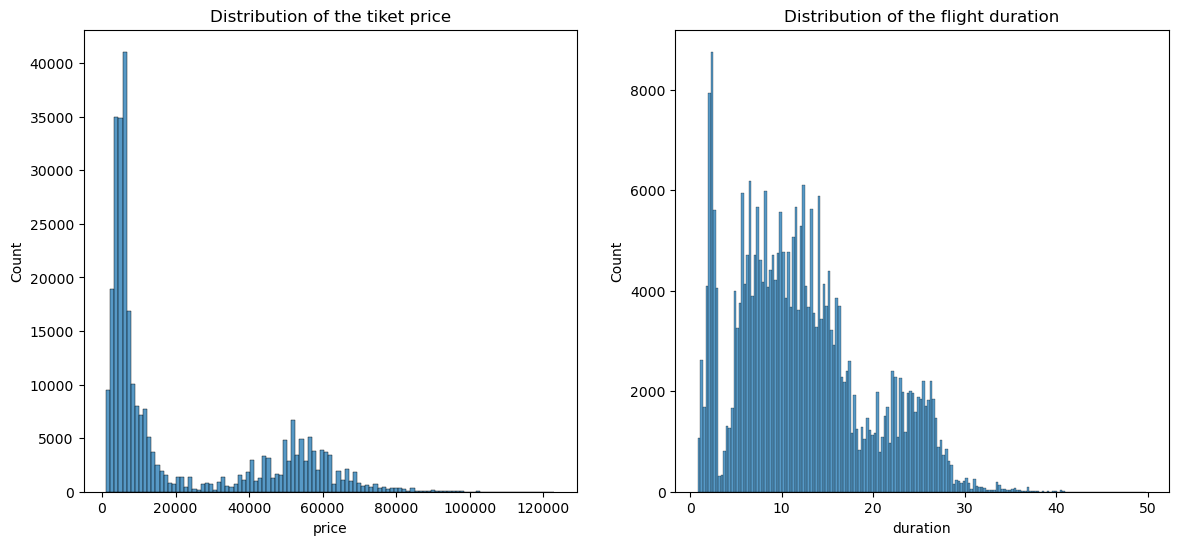

In [17]:
#Check the distribution of key columns like ticket price, flight duration

plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.histplot(df["price"])
plt.title("Distribution of the tiket price")

plt.subplot(1,2,2)
sns.histplot(df["duration"])
plt.title("Distribution of the flight duration")

Univariate Analysis

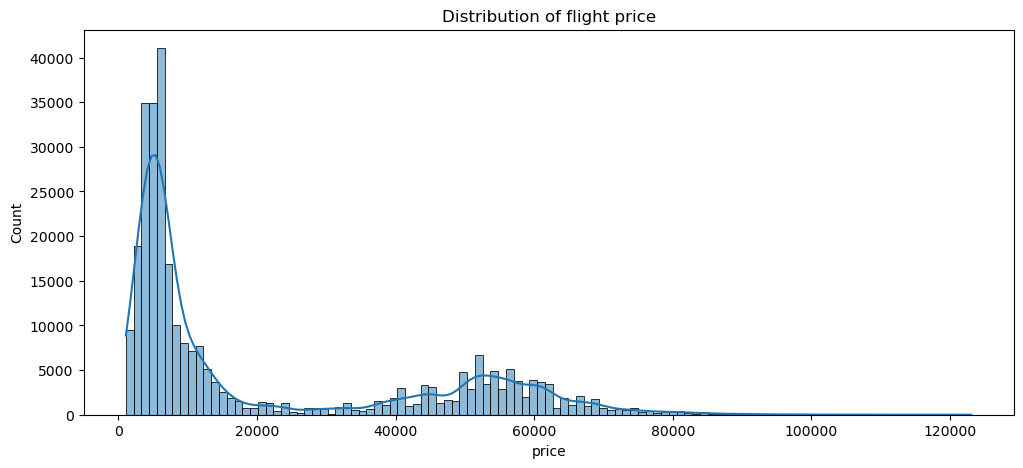

In [18]:
#Plot the distribution of flight prices.

plt.figure(figsize=(12,5))
sns.histplot(df["price"],kde=True)
plt.title("Distribution of flight price")
plt.show()

In [19]:
#Identify the busiest source and destination airports.

print(df.columns)

busiest_source_city=df.groupby("source_city")["flight"].count().sort_values(ascending=False).head(1)
busiest_destination_city=df.groupby("destination_city")["flight"].count().sort_values(ascending=True).head(1)
print(busiest_source_city)
print(busiest_destination_city)

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price'],
      dtype='object')
source_city
Delhi    61343
Name: flight, dtype: int64
destination_city
Chennai    40368
Name: flight, dtype: int64


Bivariate Analysis

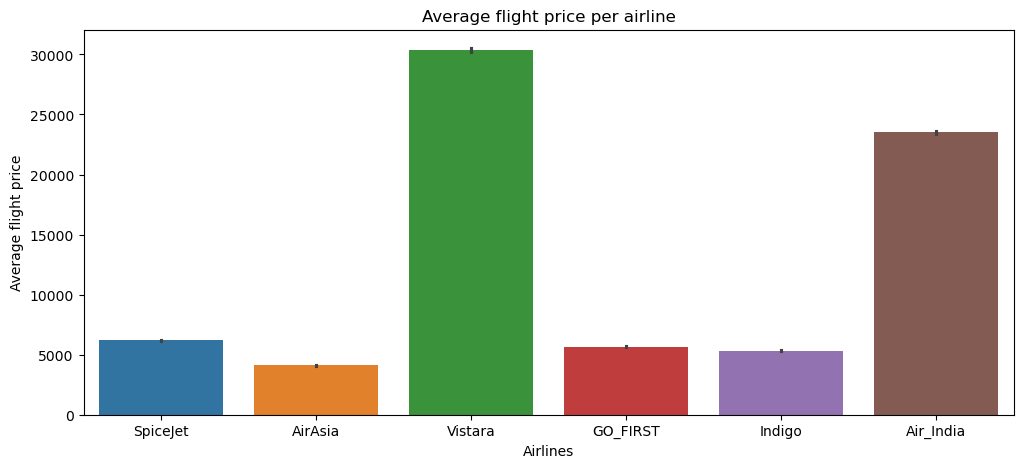

In [20]:
#Compare average flight price per airline.
plt.figure(figsize=(12,5))
sns.barplot(x=df["airline"],y=df["price"],estimator="mean",hue=df["airline"])
plt.title("Average flight price per airline")
plt.xlabel("Airlines")
plt.ylabel("Average flight price")
plt.show()

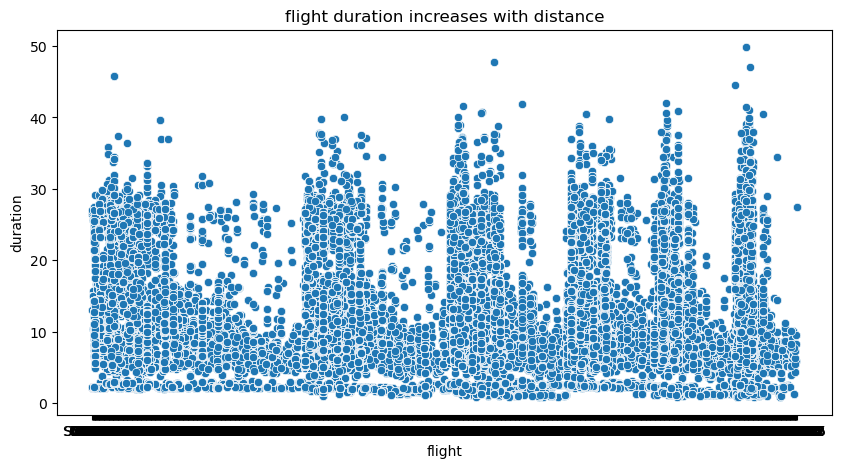

In [21]:
#Check if flight duration increases with distance (scatter plot).
plt.figure(figsize=(10,5))
sns.scatterplot(x=df["flight"],y=df["duration"])
plt.title("flight duration increases with distance")
plt.show()

In [22]:
#average price by flight
average_price_airline=df.groupby("airline")["price"].mean().sort_values(ascending=False)
print(average_price_airline)

airline
Vistara      30396.536302
Air_India    23507.019112
SpiceJet      6179.278881
GO_FIRST      5652.007595
Indigo        5324.216303
AirAsia       4091.072742
Name: price, dtype: float64


In [23]:
#Group by source city and find average flight duration
avg_flight_duration_source_city=df.groupby("source_city")["duration"].mean().sort_values(ascending=False)
print(avg_flight_duration_source_city)

source_city
Kolkata      13.249898
Chennai      12.838901
Hyderabad    12.268075
Bangalore    12.029203
Mumbai       11.888448
Delhi        11.515499
Name: duration, dtype: float64


In [24]:
#Group by route (Source → Destination) and find top 10 most expensive routes.
df["route"]=df["source_city"]+"->"+df["destination_city"]

expensive_route=df.groupby("route")["price"].mean().sort_values(ascending=False)
print(f"Top 10 most expensive route are:==> {expensive_route.head(10)}")

Top 10 most expensive route are:==> route
Chennai->Bangalore    25081.850454
Kolkata->Chennai      23660.361040
Bangalore->Kolkata    23500.061229
Bangalore->Chennai    23321.850078
Mumbai->Bangalore     23147.873807
Bangalore->Mumbai     23128.618672
Mumbai->Chennai       22781.899112
Chennai->Mumbai       22765.849647
Kolkata->Bangalore    22744.808428
Chennai->Kolkata      22669.932407
Name: price, dtype: float64


In [25]:
#Identify flights priced way above the normal range.
above_normal_price_flight=df.groupby("flight")["price"].max().sort_values(ascending=False)
print(f"Top 5 flights that charged more than the normal price")
print(f"\n {above_normal_price_flight.head(5)}")

Top 5 flights that charged more than the normal price

 flight
UK-772    123071
UK-811    117307
UK-809    116562
UK-870    115211
UK-832    114704
Name: price, dtype: int64


In [26]:
#Find unusually long or unusually short flight durations.
long_flight_duration=df.groupby("flight")["duration"].max().sort_values(ascending=False).head(1)
short_flight_duration=df.groupby("flight")["duration"].max().sort_values(ascending=True).head(1)

print(f"The unusual long flight duration is: {long_flight_duration}")
print(f"The unusual short flight duration is: {short_flight_duration}")

The unusual long flight duration is: flight
AI-672    49.83
Name: duration, dtype: float64
The unusual short flight duration is: flight
6E-987    0.83
Name: duration, dtype: float64


In [27]:
#List 5 routes that offer the cheapest flights.
cheapest_route_flight=df.groupby("route")["price"].min().sort_values(ascending=True).head(5)
print(cheapest_route_flight)

route
Chennai->Hyderabad      1105
Chennai->Bangalore      1443
Hyderabad->Chennai      1543
Bangalore->Chennai      1603
Bangalore->Hyderabad    1694
Name: price, dtype: int64


In [28]:
#Suggest pricing insights for a new airline entering the market.
minmum_price_duration=df.groupby("duration")["price"].min().sort_values().head(1)
maximum_price_duration=df.groupby("duration")["price"].max().sort_values().head(1)
avg_price_duration=df.groupby("duration")["price"].mean().sort_values(ascending=False).head(1)
print(minmum_price_duration)
print(maximum_price_duration)
print(avg_price_duration)

duration
7.67    1105
Name: price, dtype: int64
duration
0.83    3498
Name: price, dtype: int64
duration
32.0    55228.65625
Name: price, dtype: float64


In [29]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'route'],
      dtype='object')

In [30]:
df.columns

Index(['index', 'airline', 'flight', 'source_city', 'departure_time', 'stops',
       'arrival_time', 'destination_city', 'class', 'duration', 'days_left',
       'price', 'route'],
      dtype='object')

In [31]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,route
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,Delhi->Mumbai
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,Delhi->Mumbai
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,Delhi->Mumbai
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,Delhi->Mumbai
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,Delhi->Mumbai
